# Quantum mechanical scattering

This notebook goes through a numerical calculation of the elastic scattering of a non-relativistic quantum particle, using the Born series.

As discussed in class, the key quantity of interest in scattering experiments is the scattering amplitude, $f(\mathbf{k}_i\rightarrow\mathbf{k}_f)$, which describes the quantum amplitude for an incoming plane wave of wavevector $\mathbf{k}_i$ to scatter into wavevector $\mathbf{k}_f$.

## Born series: theory

The Born series formula for the scattering amplitude, to second order and for 3D space, is

$$f(\mathbf{k}_i\rightarrow \mathbf{k}_f) \approx - \frac{2m}{\hbar^2} \,\cdot \, 2\pi^2 \, \Bigg[\big\langle \mathbf{k}_f\big| \hat{V}\big|\mathbf{k}_i\big\rangle + \big\langle \mathbf{k}_f \big| \hat{V}\hat{G}_0 \hat{V} \big|\mathbf{k}_i\big\rangle + \cdots \Bigg].$$

The particle mass is $m$, the scattering potential operator is $\hat{V}$, and $|\mathbf{k}\rangle$ denotes a momentum eigenstate corresponding to wavevector $\mathbf{k}$.  In the position basis,

$$\langle \mathbf{r}|\mathbf{k}\rangle = \frac{e^{i\mathbf{k}\cdot \mathbf{r}}}{(2\pi)^{3/2}}.$$

Hence,

$$\begin{aligned}\big\langle \mathbf{k}_f\big| \hat{V}\big|\mathbf{k}_i\big\rangle &= \int d^3r_1\; \frac{\exp(-i\mathbf{k}_f \cdot \mathbf{r}_1)}{(2\pi)^{3/2}} \, V(\mathbf{r}_1) \, \frac{\exp(i\mathbf{k}_i \cdot \mathbf{r}_1)}{(2\pi)^{3/2}} \\ &= \frac{1}{(2\pi)^3} \int d^3r_1\; V(\mathbf{r}_1) \; \exp\Big[i(\mathbf{k}_i-\mathbf{k}_f) \cdot \mathbf{r}_1\Big] \end{aligned} \qquad \mathrm{where}\; |\mathbf{k}_i| = |\mathbf{k}_f| = k.$$

Likewise,

$$\big\langle \mathbf{k}_f\big| \hat{V} \hat{G}_0\hat{V}\big|\mathbf{k}_i\big\rangle = - \frac{1}{(2\pi)^3} \frac{2m}{\hbar^2} \int d^3r_1 d^3r_2 \; V(\mathbf{r}_1) \; V(\mathbf{r}_2) \; \exp\Big[i\big(\mathbf{k}_i\cdot \mathbf{r}_1 - \mathbf{k}_f \cdot \mathbf{r}_2\big)\Big] \; \frac{\exp[ik|\mathbf{r}_1 - \mathbf{r}_2|]}{4\pi|\mathbf{r}_1 - \mathbf{r}_2|}$$

An expedient way to calculate these integrals is [Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration). Suppose we want to compute an integral of the form


$$I = \int_{V} d^3r \, F(\mathbf{r}),$$

taken over some domain of volume $V$.  We randomly sample $N$ points, $\{F_1, F_2, \dots, F_N\}$.  Then the estimate for the integral is

$$I \,\approx\, \frac{V}{N} \sum_{n=1}^N F_n.$$




## Born series: code

We will assume computational units, $m = \hbar = 1$. Note that the code below is written for clarity, not performance. If you want to optimize it, please do.

First, we import the [Scipy](https://scipy.org/) libraries, and the [Matplotlib](https://matplotlib.org/) library for plotting. Then, we define a function that calculates the first term of the Born series via Monte Carlo integration:

In [37]:
import numpy as np
import matplotlib.pyplot as plt

## Function to estimate the first Born contribution to the scattering amplitude f.
## The inputs are:
##
## Vfun   -- A function object.  This function should take an array [x, y, z]
##           and return a number, the value of the potential V(x,y,z).
## ki, kf -- Initial and final wavevectors.  Their magnitudes are assumed to be equal.
## L      -- Size of sampling box.  Each coordinate is drawn from [-L, L].
## N      -- Number of Monte Carlo runs
## order  -- The Born series order up to which we calculate.

def fborn1(Vfun, ki, kf, L, N=5000):
    
    assert abs(np.dot(ki,ki) - np.dot(kf,kf)) < 1e-5    # ki and kf should have equal magnitude

    volume = (2*L)**3    # Spatial volume of integration
    f1 = 0.0             # Scattering amplitude
    for n in range(N):
        r1  = 2 * L * np.random.random(3) - L # Each coordinate is -L to L
        dkr = np.dot(ki - kf, r1)
        f1 += - Vfun(r1) * np.exp(1j * dkr) / (2 * np.pi)
    return (1/N) * volume * f1


Here is an explanation of the above code. For $\hbar = m = 1$, the first-order term in the Born series is

$$f^{(1)}(\mathbf{k}_i\rightarrow \mathbf{k}_f) = - \frac{1}{2\pi} V(\mathbf{r}_1) \int d^3 r_1 \exp\Big[i(\mathbf{k}_i-\mathbf{k}_f) \cdot \mathbf{r}_1\Big].$$

During each Monte Carlo iteration, we draw a random three-component vector $\mathbf{r}_1$ from a cube of side $2L$, centered at the origin (i.e., each coordinate is drawn from a uniform distribution between $-L$ and $L$). Then we calculate the value of the integrand at that sampling point:

$$- \frac{1}{2\pi} V(\mathbf{r}_1) \; \exp\Big[i(\mathbf{k}_i-\mathbf{k}_f) \cdot \mathbf{r}_1\Big].$$

The result is added to the variable `f1`, and the process is performed a total of $N$ times.  Finally, we divide by $N$ to take the mean, and multiply by the volume $V = (2L)^3$, to get the Monte Carlo estimate for $f^{(1)}$.

### Task 1 (6 marks)

Write a function `fborn2` to calculate the second-order term in the Born series.  The relevant integral is


$$f^{(2)} = \frac{1}{4\pi^2} \int d^3 r_1 \int d^3r_2  V(\mathbf{r}_1) \; V(\mathbf{r}_2) \; \exp\Big[i\big(\mathbf{k}_i\cdot \mathbf{r}_1 - \mathbf{k}_f \cdot \mathbf{r}_2\big)\Big] \; \frac{\exp[ik|\mathbf{r}_1 - \mathbf{r}_2|]}{|\mathbf{r}_1 - \mathbf{r}_2|}.$$


Note: the double integral can be sampled using a *single* Monte Carlo loop---don't use two nested loops!  The relevant hypervolume is $V^2 = (2L)^6$.

In [31]:
## Function to estimate the first Born contribution to the scattering amplitude f.
def fborn2(Vfun, ki, kf, L, N=5000):
    # Fill in code here
    return 0.0 # FIXME.

## Born series: plotting

We can now use the above code to compute scattering amplitudes. First, let us define a simple scattering potential of the form

$$V(\mathbf{r}) = \begin{cases}0.1, & |\mathbf{r}| < 1 \\ 0 & \mathrm{otherwise}\end{cases}$$

In [16]:
def V1(r):
    return 0.1 if np.absolute(np.dot(r,r)) < 1.0 else 0.0

The following code plots the energy dependence of the scattering amplitude for 90-degree deflection angles, using the first Born approximation:

IntProgress(value=0, max=20)

Text(0, 0.5, '|f|^2')

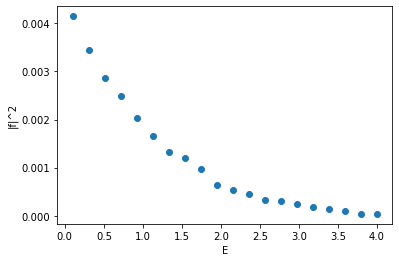

In [38]:
from ipywidgets import IntProgress # For progress reporter
from IPython.display import display

nd   = 20
Emin = 0.1
Emax = 4.0
L    = 1.0

progress_bar = IntProgress(min=0, max=nd)
display(progress_bar)

Evec = np.linspace(Emin, Emax, nd)        # array of energies
fvec = np.zeros(len(Evec), dtype=complex) # scattering amplitudes to calculate

for n in range(nd):
    ## For each E, ki is in the z direction and kf in the x direction.
    k  = np.sqrt(2*Evec[n])
    ki = np.array([0,0,k])
    kf = np.array([k,0,0])
    
    fvec[n] = fborn1(V1, ki, kf, L)
    progress_bar.value += 1

## Plot the differential scattering cross section
plt.plot(Evec, abs(fvec)**2, 'o')
plt.xlabel('E'); plt.ylabel('|f|^2')

### Task 2 (6 marks)

Modify the above code to plot the first Born approximation and second Born approximation in a single graph.

Note: the second Born approximation refers to $f^{(1)} + f^{(2)}$.

### Task 3 (8 marks)

Write code to plot $|f|^2$ versus deflection angle at fixed $E$. In your answer, be sure to explain (in code comments) how the deflection angle is defined.

## Comparison with exact results (OPTIONAL)

### Task 4 (0 marks)

It is instructive to compare the Born approximation to exact results. For the spherically symmetric potential defined above, exact formulas for the scattering amplitudes can be obtained from partial wave analysis (Appendix A of the course notes). The results are

$$\begin{aligned}f(\mathbf{k}_i \rightarrow k\hat{\mathbf{r}}) &= \frac{1}{2ik}\, \sum_{\ell =0}^\infty \big(e^{2i\delta_\ell} - 1\big) \big(2\ell+1\big)\, P_{\ell}(\hat{\mathbf{k}}_i\cdot \hat{\mathbf{r}}) \\ \delta_\ell &= \frac{\pi}{2} + \mathrm{arg}\!\left[k{h_\ell^+}'(kR) \, j_\ell(qR) - qh_\ell^+(kR)\, j_\ell'(qR)\right] \\ k &= |\mathbf{k}_i| = \sqrt{2mE/\hbar^2}, \;\; q = \sqrt{2m(E+U)/\hbar^2}.\end{aligned}$$

You can use [`scipy.special.lpmv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lpmv.html) to compute Legendre polynomials, and [`scipy.special.spherical_jn`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_jn.html) to compute spherical Bessel functions of the first kind ($j_\ell$) and its first derivative ($j_\ell'$). To calculate the spherical Hankel functions ($h_\ell^+$) and its derivative (${h_\ell^+}'$), use the identity

$$h_\ell = j_\ell + i y_\ell$$

where $j_\ell$ is the spherical Bessel function of the first kind, and $y_\ell$ is the spherical Bessel function of the second kind, which can be computed with [`scipy.special.yn`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.spherical_yn.html).

Modify the code for Tasks 2 and 3 to plot the exact results in the same graphs, fo